In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as pl
from sklearn.metrics import r2_score

### Import data

In [26]:
nb_2016 = pd.read_csv('neighbourhood-profiles-2016-csv.csv')
nb_2016.head(3)

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"


### Create new tables for each Category with name of 'nb2016_Category'

In [27]:
tableName = []
for i in nb_2016['Category'].unique():
    j = i.title().replace(', ', '').replace(' ', '')
    tableName.append('nb2016_' + j)
    globals()['nb2016_' + j] = nb_2016[nb_2016['Category'] == i]
tableName

['nb2016_NeighbourhoodInformation',
 'nb2016_Population',
 'nb2016_FamiliesHouseholdsAndMaritalStatus',
 'nb2016_Language',
 'nb2016_Income',
 'nb2016_ImmigrationAndCitizenship',
 'nb2016_VisibleMinority',
 'nb2016_EthnicOrigin',
 'nb2016_AboriginalPeoples',
 'nb2016_Education',
 'nb2016_Housing',
 'nb2016_LanguageOfWork',
 'nb2016_Labour',
 'nb2016_JourneyToWork',
 'nb2016_Mobility']

### Create subset of population

In [28]:
# Create new column names
ColName = {}
n=2
for i in nb2016_Population['Characteristic'][0:7]:
    j = i.title().replace(', ', '').replace(' ', '').replace('-', '')
    ColName[n] = j
    n = n + 1

In [29]:
# Rename column name
nb2016Pop = nb2016_Population[0:7].iloc[:, 5:].transpose().rename(columns=ColName)
nb2016Pop.head(3)

,Population2016,Population2011,PopulationChange20112016,TotalPrivateDwellings,PrivateDwellingsOccupiedByUsualResidents,PopulationDensityPerSquareKilometre,LandAreaInSquareKilometres
City of Toronto,"2,731,571","2,615,060",4.50%,"1,179,057","1,112,929","4,334",630.2
Agincourt North,"29,113","30,279",-3.90%,"9,371","9,120","3,929",7.41
Agincourt South-Malvern West,"23,757","21,988",8.00%,"8,535","8,136","3,034",7.83


In [30]:
print(nb2016Pop.columns.values)

['Population2016' 'Population2011' 'PopulationChange20112016'
 'TotalPrivateDwellings' 'PrivateDwellingsOccupiedByUsualResidents'
 'PopulationDensityPerSquareKilometre' 'LandAreaInSquareKilometres']


In [31]:
print(nb2016Pop.dtypes)

Population2016                              object
Population2011                              object
PopulationChange20112016                    object
TotalPrivateDwellings                       object
PrivateDwellingsOccupiedByUsualResidents    object
PopulationDensityPerSquareKilometre         object
LandAreaInSquareKilometres                  object
dtype: object


In [32]:
# Convert string to int and float
for i in nb2016Pop.columns:
    if i == 'PopulationChange20112016':
        nb2016Pop[i] = nb2016Pop[i].str.replace('%', '').astype(float) / 100
    elif i == 'LandAreaInSquareKilometres':
        nb2016Pop[i] = nb2016Pop[i].str.replace(',', '').astype(float)
    else: 
        nb2016Pop[i] = nb2016Pop[i].str.replace(',', '').astype(int)

In [33]:
# Check data types
nb2016Pop.dtypes

Population2016                                int32
Population2011                                int32
PopulationChange20112016                    float64
TotalPrivateDwellings                         int32
PrivateDwellingsOccupiedByUsualResidents      int32
PopulationDensityPerSquareKilometre           int32
LandAreaInSquareKilometres                  float64
dtype: object

In [34]:
# Check null
for i in nb2016Pop.columns:
    j = nb2016Pop[nb2016Pop[i].isna()==True].index
    print(i, j)

Population2016 Index([], dtype='object')
Population2011 Index([], dtype='object')
PopulationChange20112016 Index([], dtype='object')
TotalPrivateDwellings Index([], dtype='object')
PrivateDwellingsOccupiedByUsualResidents Index([], dtype='object')
PopulationDensityPerSquareKilometre Index([], dtype='object')
LandAreaInSquareKilometres Index([], dtype='object')


In [36]:
# Check correlation
nb2016Pop.corr()

,Population2016,Population2011,PopulationChange20112016,TotalPrivateDwellings,PrivateDwellingsOccupiedByUsualResidents,PopulationDensityPerSquareKilometre,LandAreaInSquareKilometres
Population2016,1.000000,0.999948,0.017433,0.999673,0.999762,-0.031591,0.997470
Population2011,0.999948,1.000000,0.008348,0.999409,0.999535,-0.033305,0.997617
PopulationChange20112016,0.017433,0.008348,1.000000,0.033966,0.031286,0.195364,0.001156
TotalPrivateDwellings,0.999673,0.999409,0.033966,1.000000,0.999988,-0.020449,0.996270
PrivateDwellingsOccupiedByUsualResidents,0.999762,0.999535,0.031286,0.999988,1.000000,-0.021564,0.996450
PopulationDensityPerSquareKilometre,-0.031591,-0.033305,0.195364,-0.020449,-0.021564,1.000000,-0.067496
LandAreaInSquareKilometres,0.997470,0.997617,0.001156,0.996270,0.996450,-0.067496,1.000000


In [38]:
# Get a rate of private dwelling and population
nb2016Pop['dw_pop'] = nb2016Pop['TotalPrivateDwellings'] / nb2016Pop['Population2016']

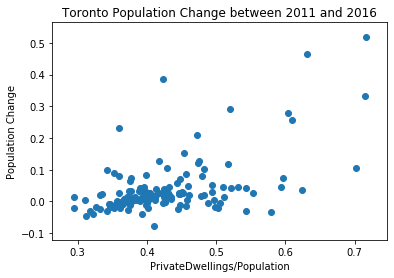

In [41]:
plt.scatter(nb2016Pop['dw_pop'], nb2016Pop['PopulationChange20112016'])
plt.title('Toronto Population Change between 2011 and 2016')
plt.xlabel('PrivateDwellings/Population')
plt.ylabel('Population Change')
plt.show()

### Set train and test

In [47]:
# train = nb2016Pop.sample(frac=0.8)
train = nb2016Pop[:113]
# test = pd.concat([nb2016Pop, train]).drop_duplicates(keep=False)
test = nb2016Pop[113:]
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, City of Toronto to St.Andrew-Windfields
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Population2016                            113 non-null    int32  
 1   Population2011                            113 non-null    int32  
 2   PopulationChange20112016                  113 non-null    float64
 3   TotalPrivateDwellings                     113 non-null    int32  
 4   PrivateDwellingsOccupiedByUsualResidents  113 non-null    int32  
 5   PopulationDensityPerSquareKilometre       113 non-null    int32  
 6   LandAreaInSquareKilometres                113 non-null    float64
 7   dw_pop                                    113 non-null    float64
dtypes: float64(3), int32(5)
memory usage: 5.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Steeles to Yorkdale-Glen Park
Data columns (tot

### Build polinomial model

In [48]:
model = pl.Polynomial(pl.polyfit(train['dw_pop'], train['PopulationChange20112016'], 2))
print(model)
model

poly([ 0.10946714 -0.7616271   1.35243886])


Polynomial([ 0.10946714, -0.7616271 ,  1.35243886], domain=[-1,  1], window=[-1,  1])

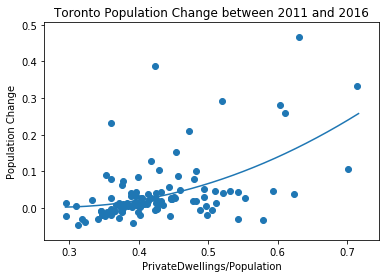

In [49]:
myline = np.linspace(min(nb2016Pop['dw_pop']), max(nb2016Pop['dw_pop']), 141)
plt.scatter(train['dw_pop'], train['PopulationChange20112016'])
plt.plot(myline, model(myline))
plt.title('Toronto Population Change between 2011 and 2016')
plt.xlabel('PrivateDwellings/Population')
plt.ylabel('Population Change')
plt.show()

### R-Squared

In [55]:
r2 = r2_score(test['PopulationChange20112016'], model(test['dw_pop']) )
print('r-squared =', r2)

r-squared = 0.5782236845307503


#### r-square is 0.5782, so the model is not good enough.
#### However, this project is only an simple example for building polynoomial model.